# INSTALL REQUIRED LIBRARIES

In [1]:
!pip install pandas matplotlib seaborn

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [3]:
import os
os.listdir('/kaggle/input/')

['world-data-population']

In [5]:
data = pd.read_csv('/kaggle/input/world-data-population/world_population_data.csv')

In [6]:
data.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


# EXPLORE THE DATA

In [12]:
# Display the first few rows of the dataset
print(data.head())

# Check the columns and their data types
print(data.info())


   rank cca3        country      continent  2023 population  2022 population  \
0     1  IND          India           Asia       1428627663       1417173173   
1     2  CHN          China           Asia       1425671352       1425887337   
2     3  USA  United States  North America        339996563        338289857   
3     4  IDN      Indonesia           Asia        277534122        275501339   
4     5  PAK       Pakistan           Asia        240485658        235824862   

   2020 population  2015 population  2010 population  2000 population  \
0       1396387127       1322866505       1240613620       1059633675   
1       1424929781       1393715448       1348191368       1264099069   
2        335942003        324607776        311182845        282398554   
3        271857970        259091970        244016173        214072421   
4        227196741        210969298        194454498        154369924   

   1990 population  1980 population  1970 population  area (km²)  \
0        870

# CREATE A BAR CHART FOR CATEGORICAL VARIABLE(CONTINENT)

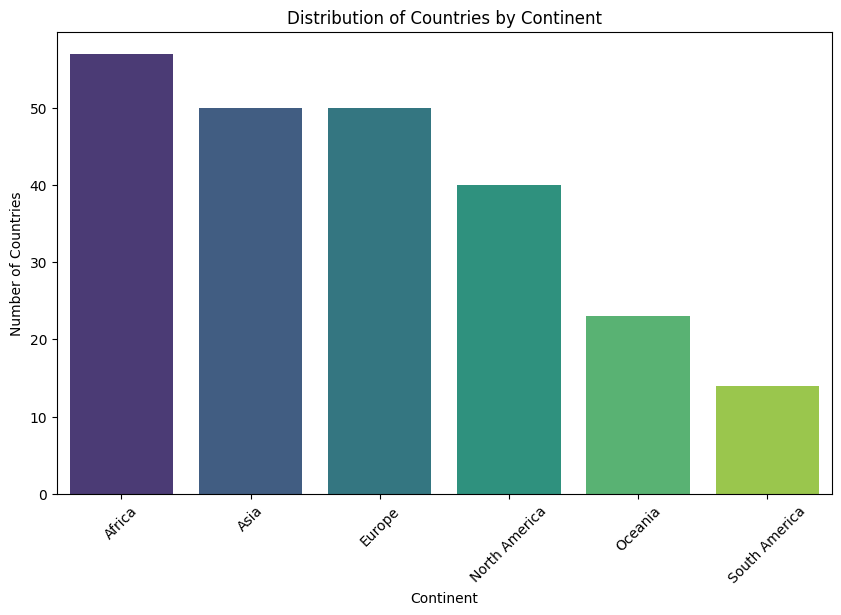

In [13]:
# Count the occurrences of each continent
continent_counts = data['continent'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')  # Create the bar chart
plt.title('Distribution of Countries by Continent')  # Add a title
plt.xlabel('Continent')  # Label for x-axis
plt.ylabel('Number of Countries')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


# CREATE A HISTOGRAM FOR CONTINUOUS VARIABLE

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


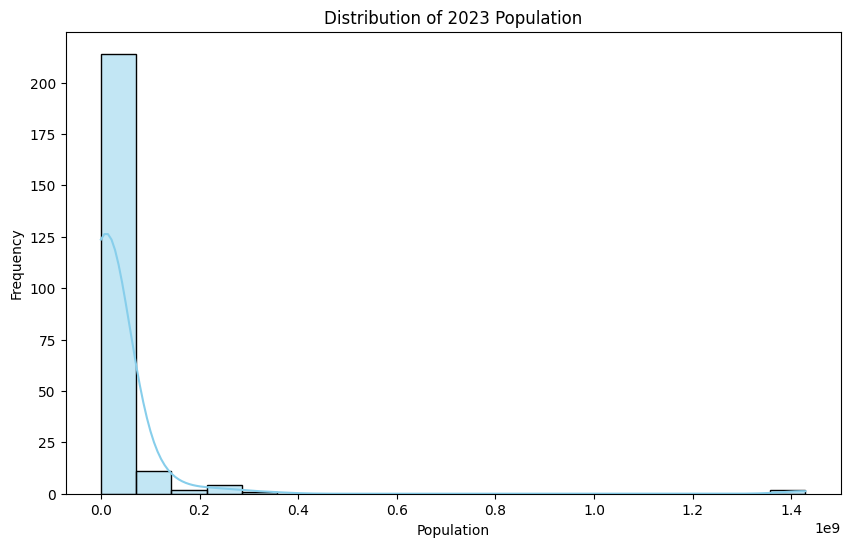

In [14]:
# Create a histogram for the '2023 population' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data['2023 population'], bins=20, kde=True, color='skyblue')  # Create the histogram with KDE
plt.title('Distribution of 2023 Population')  # Add a title
plt.xlabel('Population')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.show()  # Display the plot


# LINE PLOT

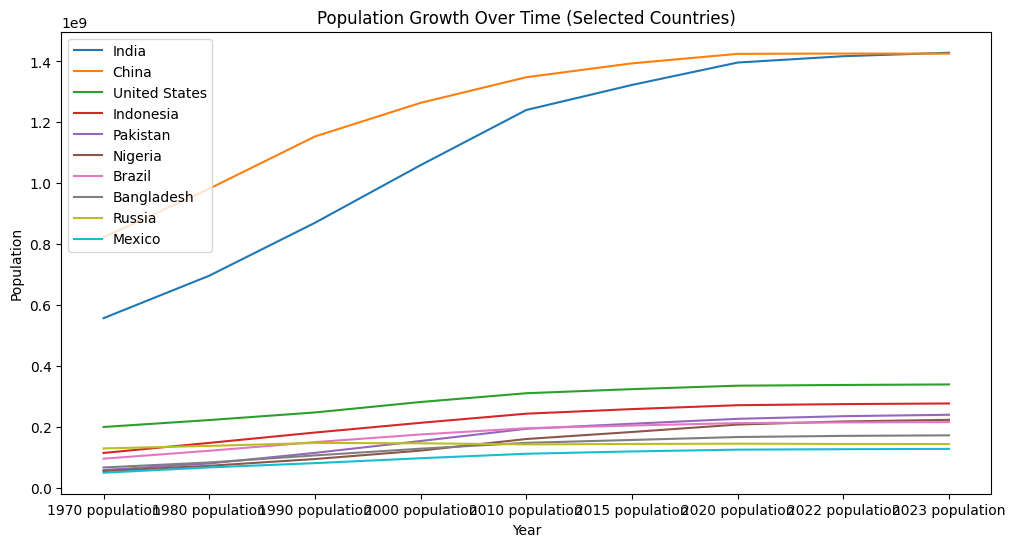

In [7]:
plt.figure(figsize=(12, 6))
for country in data['country'].unique()[:10]:  # Visualize first 10 countries
    country_data = data[data['country'] == country]
    plt.plot(
        ['1970 population', '1980 population', '1990 population', '2000 population', 
         '2010 population', '2015 population', '2020 population', '2022 population', 
         '2023 population'],
        country_data[['1970 population', '1980 population', '1990 population', '2000 population', 
                      '2010 population', '2015 population', '2020 population', '2022 population', 
                      '2023 population']].values[0], 
        label=country
    )
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time (Selected Countries)')
plt.legend(loc='upper left')
plt.show()

# BAR PLOT

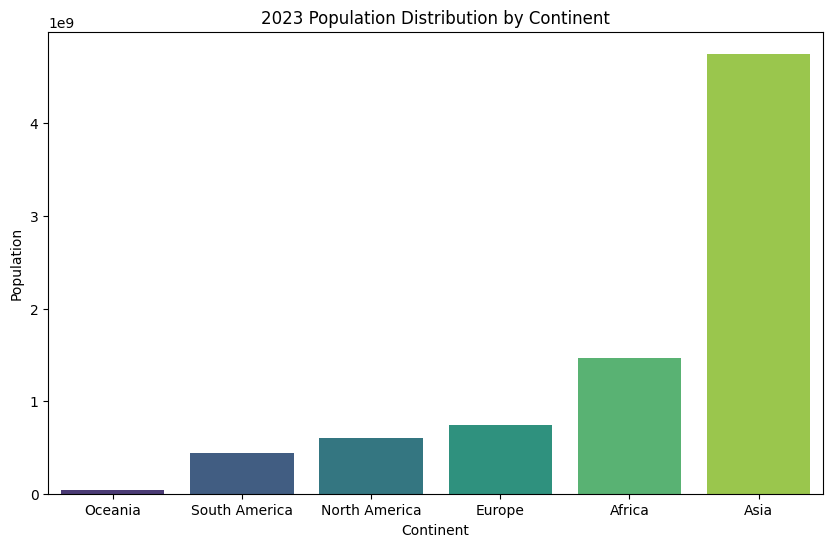

In [8]:
# Bar Plot for Population Distribution by Continent
continent_population = data.groupby('continent')['2023 population'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_population.index, y=continent_population.values, palette='viridis')
plt.title('2023 Population Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.show()


# SCATTER PLOT

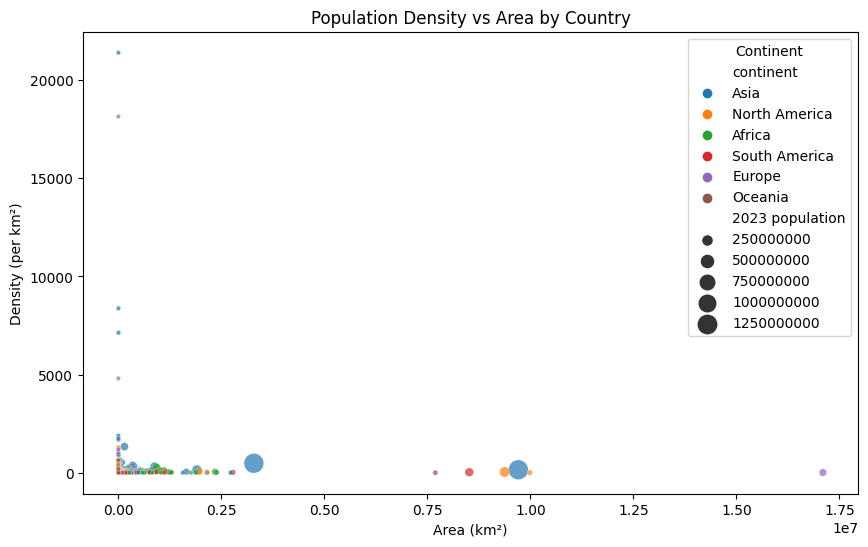

In [9]:
# Scatter Plot for Population Density vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area (km²)', y='density (km²)', hue='continent', size='2023 population', sizes=(10, 200), alpha=0.7)
plt.title('Population Density vs Area by Country')
plt.xlabel('Area (km²)')
plt.ylabel('Density (per km²)')
plt.legend(loc='upper right', title='Continent')
plt.show()


# HORIZONTAL BAR PLOT

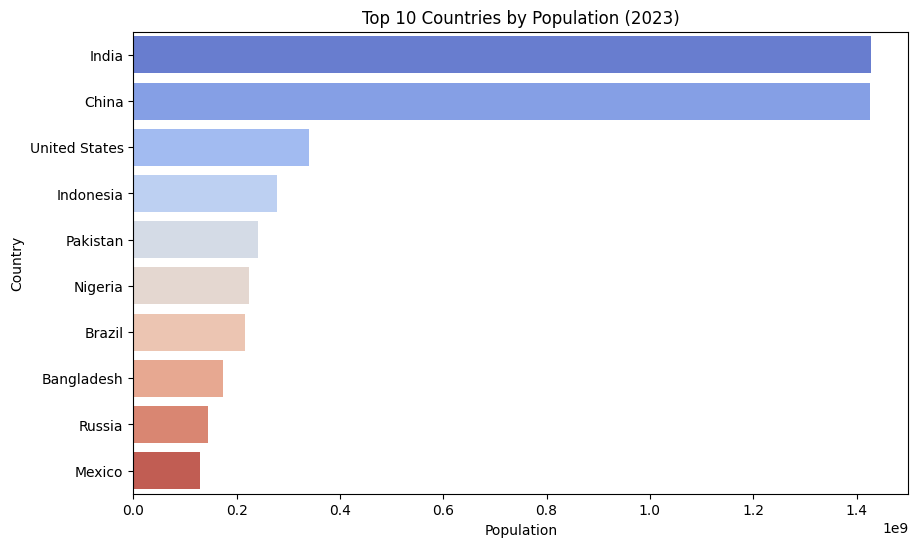

In [10]:
# Horizontal Bar Plot for Top Countries by Population
top_countries = data.nlargest(10, '2023 population')
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries['country'], x=top_countries['2023 population'], palette='coolwarm')
plt.title('Top 10 Countries by Population (2023)')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()


# AREA PLOT

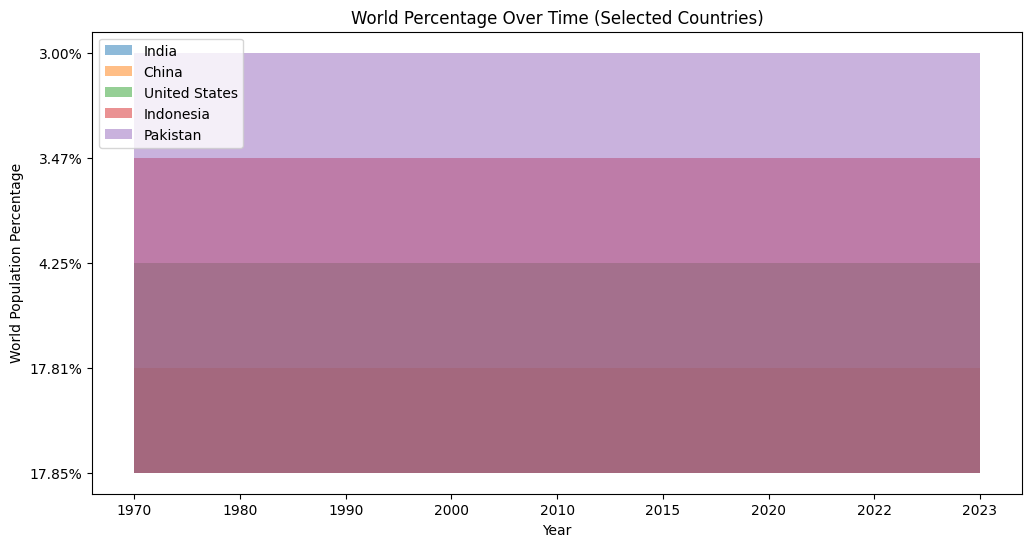

In [13]:
# Area Plot for World Percentage Over Time
plt.figure(figsize=(12, 6))
for country in data['country'].unique()[:5]:  # Select a few countries for clarity
    country_data = data[data['country'] == country]
    plt.fill_between(
        ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022', '2023'],
        country_data[['world percentage']].values[0], alpha=0.5, label=country
    )
plt.xlabel('Year')
plt.ylabel('World Population Percentage')
plt.title('World Percentage Over Time (Selected Countries)')
plt.legend(loc='upper left')
plt.show()


# HEATMAP

In [16]:
import seaborn as sns
# Remove '%' and convert to float for specific columns
data['growth rate'] = data['growth rate'].str.replace('%', '').astype(float) / 100  # Convert to decimal
data['world percentage'] = data['world percentage'].str.replace('%', '').astype(float) / 100  # Convert to decimal

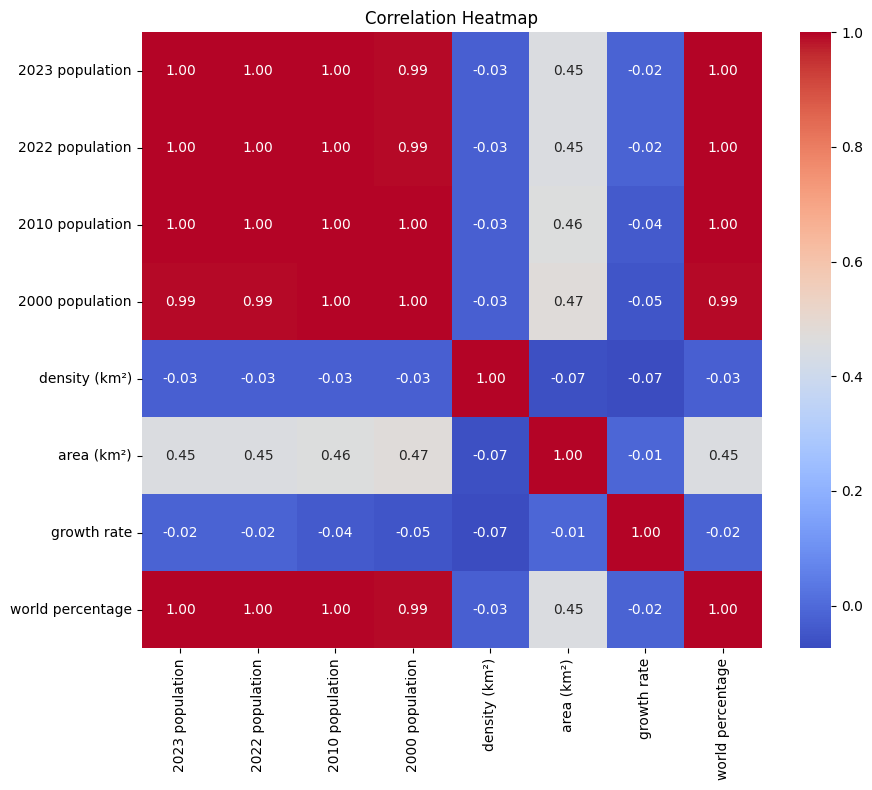

In [17]:
# Generate the correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = data[['2023 population', '2022 population', '2010 population', 
                           '2000 population', 'density (km²)', 'area (km²)', 
                           'growth rate', 'world percentage']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()